# Recomendación de Películas Basada en Redes Neuronales


## 1. Introducción
El objetivo de este proyecto es desarrollar un sistema de recomendación de películas utilizando redes neuronales. Este sistema recomendará películas basándose en las preferencias de género de los usuarios. Para lograr esto, se utilizará una base de datos de películas y se entrenará una red neuronal que aprenderá a predecir las preferencias de los usuarios a partir de sus calificaciones anteriores.



## 2. Recolección de Datos
El proyecto utilizará el conjunto de datos dethemoviedb, que es una colección bien conocida y ampliamente utilizada en la investigación sobre sistemas de recomendación. Este conjunto de datos contiene información sobre películas, géneros y calificaciones de usuarios, lo que proporciona una base sólida para el desarrollo del sistema de recomendación.


## 3. Preprocesamiento de Datos
Antes de entrenar el modelo, los datos deben ser preprocesados. Este paso incluye la limpieza de datos, como el manejo de valores nulos y la eliminación de duplicados. Además, se realizará la codificación de los géneros de las películas en un formato que pueda ser interpretado por la red neuronal. Esto implica convertir las etiquetas de texto de los géneros en vectores binarios mediante un proceso llamado binarización.


## 4. Construcción del Modelo
El corazón del sistema de recomendación será una red neuronal construida utilizando TensorFlow y Keras. La red neuronal se diseñará con varias capas densamente conectadas que permitirán al modelo aprender las complejas relaciones entre los géneros de las películas y las calificaciones de los usuarios. Se seleccionará una arquitectura adecuada y se configurarán los parámetros del modelo, como el número de neuronas en cada capa y las funciones de activación.



## 5. Entrenamiento del Modelo
El modelo se entrenará utilizando los datos de calificaciones de los usuarios. Durante el entrenamiento, el modelo ajustará sus pesos para minimizar el error en la predicción de las preferencias de los usuarios. El conjunto de datos se dividirá en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo y evitar el sobreajuste. Se utilizarán técnicas de validación cruzada para asegurar la robustez del modelo.



## 6. Generación de Recomendaciones
Una vez que el modelo esté entrenado, se utilizará para generar recomendaciones de películas basadas en las preferencias de género del usuario. El usuario podrá ingresar sus géneros favoritos, y el modelo predecirá las películas que probablemente le gusten. Estas recomendaciones se presentarán en orden de probabilidad, permitiendo al usuario descubrir nuevas películas alineadas con sus intereses.



## 7. Generación del Reporte Inicial
Se generará un reporte inicial que describirá en detalle los pasos realizados hasta el momento, incluyendo:

- Descripción del conjunto de datos utilizado.
- Métodos de preprocesamiento de datos aplicados.
- Diseño y configuración de la red neuronal.
- Resultados preliminares del entrenamiento del modelo.
- Ejemplos de recomendaciones generadas.


## 8. Código


- import requests 
- import pandas as pd
- import time

###### TMDb API Key (replace with your actual key)

- api_key = '2154f70f4fd6898749d2d6c4503dd224'

##### Base URL for TMDb API

- base_url = 'https://api.themoviedb.org/3'

##### Function to get movies from TMDb API

- def get_movies_from_tmdb(start_year, end_year, api_key):
    - all_movies = []

    - for year in range(start_year, end_year + 1):
        - for page in range(1, 6):  # Limiting to 5 pages per year for this example
            - url = f"{base_url}/discover/movie?api_key={api_key}&language=en-US&sort_by=popularity.desc&primary_release_year={year}&page=- -- {page}"
            
            - for attempt in range(5):  # Retry logic
                - try:
                    - response = requests.get(url)
                    - response.raise_for_status()  # Raise an exception for HTTP errors
                    - data = response.json()

                    - if 'results' in data:
                        - all_movies.extend(data['results'])
                    - else:
                        - break  # Break if there are no more results

                    - time.sleep(0.2)  # To avoid hitting the rate limit
                    - break  # Exit retry loop if successful
                - except requests.exceptions.RequestException as e:
                    - print(f"Attempt {attempt+1} failed: {e}")
                    - time.sleep(2)  # Wait before retrying
                    - if attempt == 4:
                        - print(f"Failed to retrieve data for year {year}, page {page}")
                        - return all_movies

    - return all_movies

##### Function to extract relevant movie information

- def extract_movie_info(movies):
    - movie_data = []

    - for movie in movies:
        - movie_id = movie['id']
        - title = movie['title']
        - release_date = movie.get('release_date', '')
        - genre_ids = movie.get('genre_ids', [])
        
        - movie_data.append({
            - 'movie_id': movie_id,
            - 'title': title,
            - 'release_date': release_date,
            - 'genre_ids': genre_ids
        - })
    
    - return movie_data

##### Function to get genre names from TMDb API

- def get_genre_names(api_key):
    - url = f"{base_url}/genre/movie/list?api_key={api_key}&language=en-US"
    - response = requests.get(url)
    - data = response.json()
    
    - if 'genres' in data:
        - return {genre['id']: genre['name'] for genre in data['genres']}
    - else:
        - return {}

##### Get movies from 1990 to 2022

- movies = get_movies_from_tmdb(1990, 2022, api_key)
- movie_data = extract_movie_info(movies)

##### Get genre names

- genre_names = get_genre_names(api_key)

##### Convert genre_ids to genre names

- for movie in movie_data:
    - movie['genres'] = [genre_names.get(genre_id, '') for genre_id in movie['genre_ids']]
    - del movie['genre_ids']

##### Convert to DataFrame

- df = pd.DataFrame(movie_data)

##### Save to CSV

- df.to_csv('movies_genres_1990_2022.csv', index=False)

- print("CSV file 'movies_genres_1990_2022.csv' created successfully.")


## 9. Conclusión y Próximos Pasos
En esta etapa inicial, se ha establecido una base sólida para el sistema de recomendación de películas. Los próximos pasos incluirán la optimización del modelo, la evaluación exhaustiva de su rendimiento y la implementación de una interfaz de usuario que permita una interacción fácil y efectiva con el sistema. Además, se explorará la incorporación de otros factores, como las características demográficas de los usuarios, para mejorar la precisión de las recomendaciones.

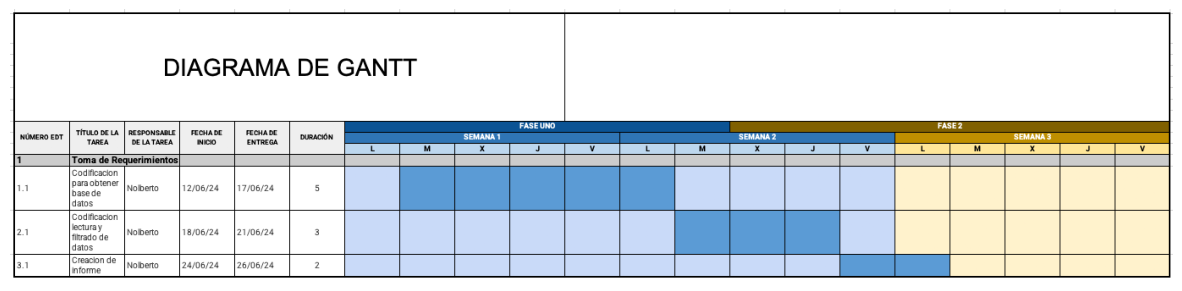

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('carta.png')

plt.figure(figsize=(15, 15))

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')
plt.show()

									